## Batch Normalization

아무것도 하지 않은 fully connected layer와 batch normalization layer를 추가한 두 실험을 비교하고자 합니다.   
중점적으로 봐야 할 내용은 정확도 비교와 속도의 차이입니다.


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Metal device set to: Apple M1 Pro
Epoch 1/20


2023-05-12 06:46:52.470647: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


21/21 [==============================] - 2s 26ms/step - loss: 1.2171 - accuracy: 0.6061 - val_loss: 0.7486 - val_accuracy: 0.7453
Epoch 2/20
21/21 [==============================] - 0s 11ms/step - loss: 0.6554 - accuracy: 0.7785 - val_loss: 0.5978 - val_accuracy: 0.8011
Epoch 3/20
21/21 [==============================] - 0s 8ms/step - loss: 0.5583 - accuracy: 0.8130 - val_loss: 0.5391 - val_accuracy: 0.8157
Epoch 4/20
21/21 [==============================] - 0s 8ms/step - loss: 0.5107 - accuracy: 0.8300 - val_loss: 0.5060 - val_accuracy: 0.8270
Epoch 5/20
21/21 [==============================] - 0s 8ms/step - loss: 0.4847 - accuracy: 0.8379 - val_loss: 0.4807 - val_accuracy: 0.8383
Epoch 6/20
21/21 [==============================] - 0s 8ms/step - loss: 0.4654 - accuracy: 0.8425 - val_loss: 0.4717 - val_accuracy: 0.8393
Epoch 7/20
21/21 [==============================] - 0s 8ms/step - loss: 0.4458 - accuracy: 0.8508 - val_loss: 0.4535 - val_accuracy: 0.8462
Epoch 8/20
21/21 [===========

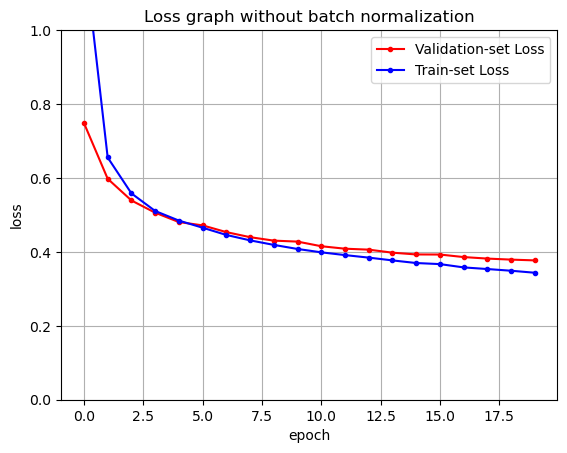

In [4]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

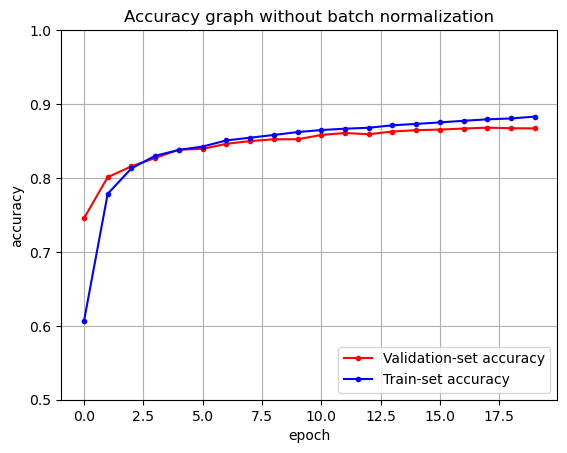

In [5]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [6]:
# Q. 두 개의 dense layer 사이에 batch normalization layer를 추가하는 코드입니다.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 여기에 batch normalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 23ms/step - loss: 0.9320 - accuracy: 0.6794 - val_loss: 1.1389 - val_accuracy: 0.6537
Epoch 2/20
21/21 [==============================] - 0s 12ms/step - loss: 0.4920 - accuracy: 0.8262 - val_loss: 0.9500 - val_accuracy: 0.7831
Epoch 3/20
21/21 [==============================] - 0s 9ms/step - loss: 0.4235 - accuracy: 0.8505 - val_loss: 0.8422 - val_accuracy: 0.8144
Epoch 4/20
21/21 [==============================] - 0s 9ms/step - loss: 0.3880 - accuracy: 0.8641 - val_loss: 0.7222 - val_accuracy: 0.8372
Epoch 5/20
21/21 [==============================] - 0s 9ms/step - loss: 0.3659 - accuracy: 0.8715 - val_loss: 0.6408 - val_accuracy: 0.8491
Epoch 6/20
21/21 [==============================] - 0s 9ms/step - loss: 0.3471 - accuracy: 0.8769 - val_loss: 0.5714 - val_accuracy: 0.8574
Epoch 7/20
21/21 [==============================] - 0s 10ms/step - loss: 0.3318 - accuracy: 0.8832 - val_loss: 0.5141 - val_accuracy: 0.8584
Epoch 8/20
21/21 

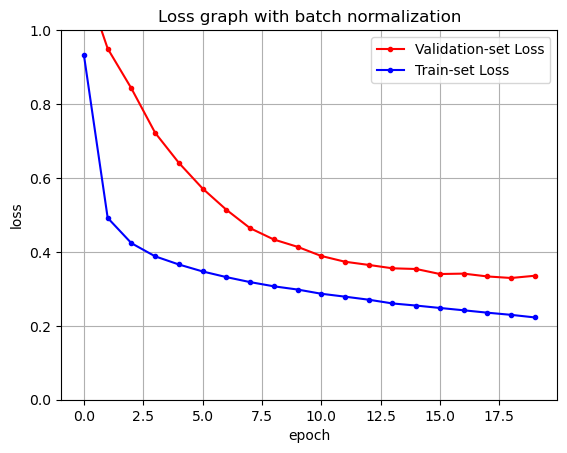

In [7]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

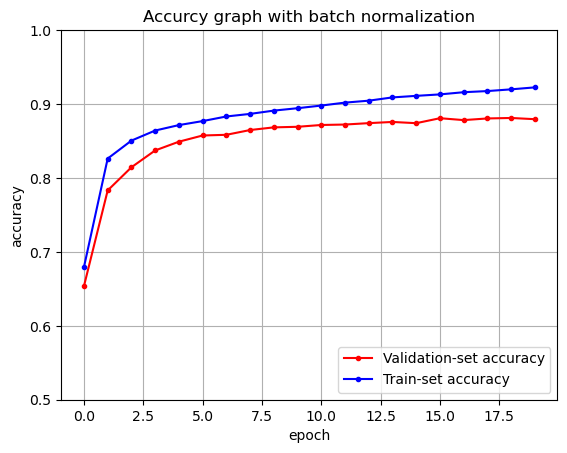

In [8]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()